# US015 - Monthly Water Consumption

## INTRODUCTION
The goal of this user story is to predict the average monthly cost of water consumption for a new park based on its area. We 
will use linear regression to model the relationship between the park area and the average monthly water consumption cost using 
the data provided. The new park has an area of 55 hectares.

We have two data sources for this User Story:
1. `Area.csv`: Contains the area of each park.
2. `water_consumption_updated.csv`: Contains the daily water consumption of various parks.

Area Data:
       Park  Area
0  Oriental    15
1    Cidade  69,9
2  SaoRoque   5,8
3    Covelo   7,7
4  ArcaAgua   2,6

Water Consumption Data:
       Park  Year  Month  Day Consumption
0  Oriental  2023      1    1        20,8
1  ArcaAgua  2023      1    1         5,2
2    Covelo  2023      1    1        9,27
3    Cidade  2023      1    1       68,25
4  Oriental  2023      1    2          19
The average monthly cost is: 1934.17€


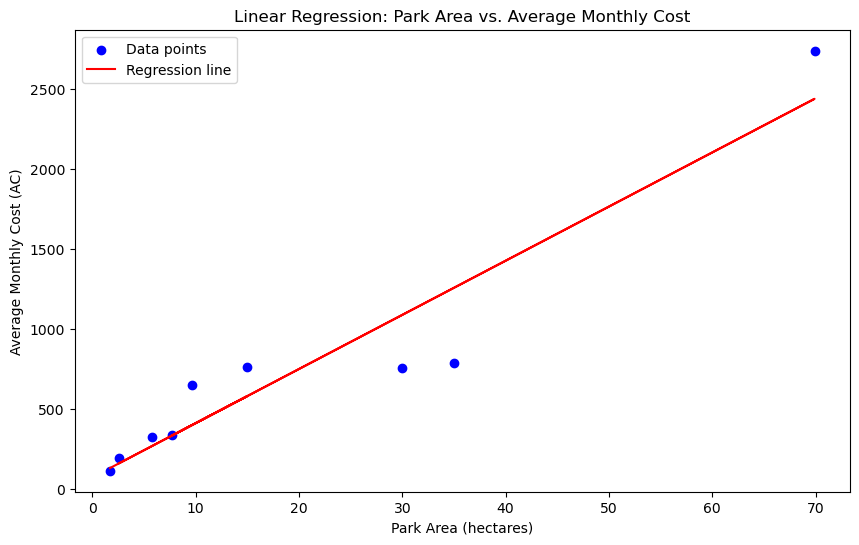

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

area_df = pd.read_csv('Area.csv', delimiter=';')
water_consumption_df = pd.read_csv('water_consumption_updated.csv', delimiter=';')

print("Area Data:")
print(area_df.head())
print("\nWater Consumption Data:")
print(water_consumption_df.head())

area_df['Area'] = area_df['Area'].str.replace(',', '.').astype(float)
water_consumption_df['Consumption'] = water_consumption_df['Consumption'].str.replace(',', '.').astype(float)

water_consumption_df['Date'] = pd.to_datetime(water_consumption_df[['Year', 'Month', 'Day']])

water_consumption_df['Month'] = water_consumption_df['Date'].dt.to_period('M')
monthly_consumption = water_consumption_df.groupby(['Park', 'Month'])['Consumption'].sum().reset_index()

monthly_consumption['Month'] = monthly_consumption['Month'].dt.to_timestamp()

def calculate_monthly_cost(consumption):
    if consumption <= 1000:
        return consumption * 0.7
    else:
        excess = consumption - 1000
        return (1000 * 0.7) + (excess * 0.7 * 1.15)

monthly_consumption['Cost'] = monthly_consumption['Consumption'].apply(calculate_monthly_cost)

average_monthly_cost = monthly_consumption.groupby('Park')['Cost'].mean().reset_index()
average_monthly_cost.head()

merged_df = pd.merge(average_monthly_cost, area_df, on='Park')
merged_df.rename(columns={'Cost': 'AverageMonthlyCost'}, inplace=True)
merged_df.head()

slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df['Area'], merged_df['AverageMonthlyCost'])

predicted_cost = intercept + slope * 55
print(f'The average monthly cost is: {predicted_cost:.2f}€')

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Area'], merged_df['AverageMonthlyCost'], color='blue', label='Data points')
plt.plot(merged_df['Area'], intercept + slope * merged_df['Area'], color='red', label='Regression line')
plt.xlabel('Park Area (hectares)')
plt.ylabel('Average Monthly Cost (AC)')
plt.title('Linear Regression: Park Area vs. Average Monthly Cost')
plt.legend()
plt.show()



## ANALYSIS

Using the regression model, we predicted the average monthly cost for a 55-hectare park. The predicted cost was approximately 1934.17€.

### Cost Calculation

Taking in mind the amount paid for water is 0.7€/m^3, up to a consumption of 1000m^3/month, with a fee of 15% added for higher consumption levels, we can now calculate the Average Monthly Cost:

#### The regression equation derived from the model is:

Average Monthly Cost=Intercept+(Slope×Area)

The scatter plot and the regression line show a positive correlation between park area and average monthly cost. The data points generally follow the trend of the regression line.

* Slope: Indicates the increase in average monthly cost for each additional hectare of park area.

* Intercept: Represents the baseline cost when the park area is zero.

* Area: Size of the surface in m^2.

### Benefits of analyzing the monthly water cost for the park

This will benefit the park, by giving the chance to make anticipated money management, wich can be used to improve the park in the future, with this 55 hectare park it is known that monthly there will be a netspend of 1934.17€ monthly in water.

# US016 - Size and Time

## INTRODUCTION
The goal of this user story is to analyse the results obtained in US14, and after execute a more advanced analysis through a polynimial regression. In US14 the main objective was to run tests for inputs of variable size, to
observe the asymptotic behavior of the execution time of the US13 algorithm. Now in US16 we pretend to dive deeper in the relationship between input size and execution time.

We have one data source for this User Story:

1. `solution_us14.csv`


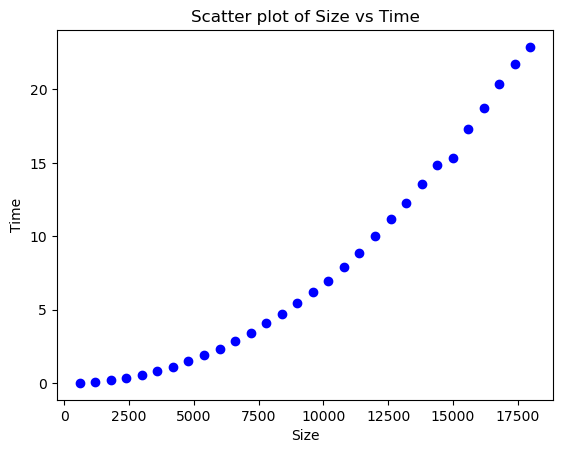

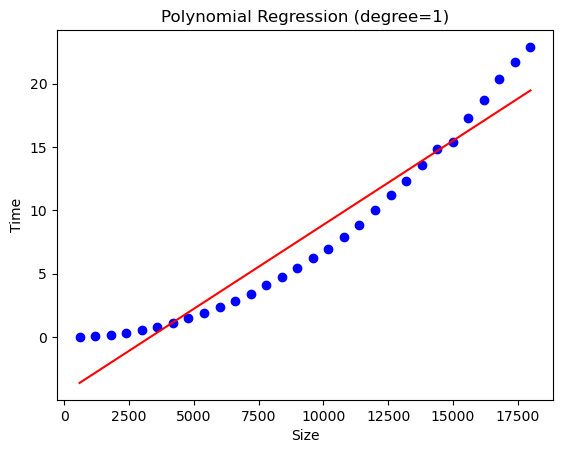

R^2 for degree 1: 0.9335101209770421


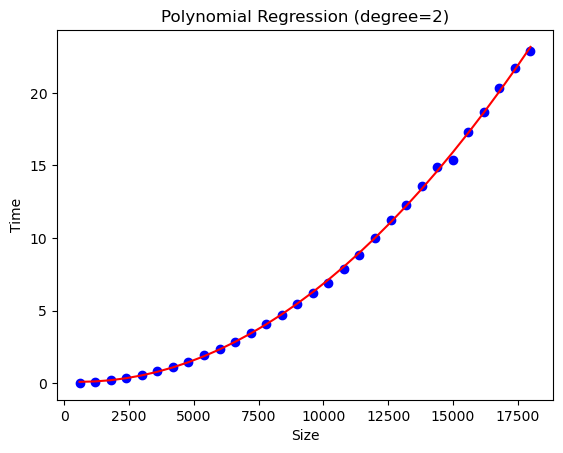

R^2 for degree 2: 0.9995515898034242


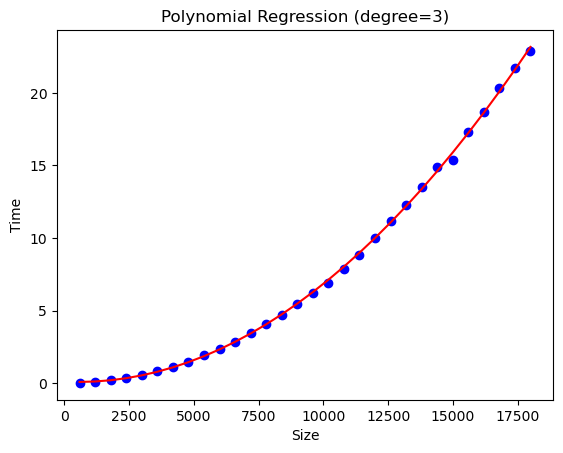

R^2 for degree 3: 0.9995518220782283


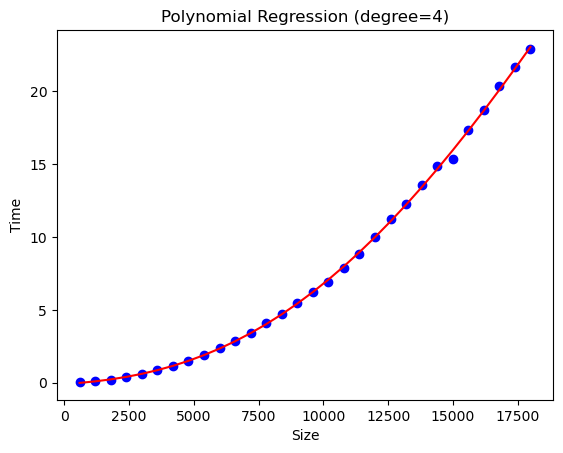

R^2 for degree 4: 0.9996017863961918


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load data from solution_us14.csv
data = pd.read_csv("solution_us14.csv", delimiter=";")
data['time'] = data['time'].str.replace(',', '.').astype(float)
X = data['size'].values.reshape(-1, 1)
y = data['time'].values

# Visualize the data
plt.scatter(X, y, color='blue')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('Scatter plot of Size vs Time')
plt.show()

# Define a function to fit polynomial regression, plot the results, and calculate R^2
def plot_polynomial_regression(X, y, degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    y_poly_pred = model.predict(X_poly)
    
    plt.scatter(X, y, color='blue')
    plt.plot(X, y_poly_pred, color='red')
    plt.xlabel('Size')
    plt.ylabel('Time')
    plt.title(f'Polynomial Regression (degree={degree})')
    plt.show()
    
    r2 = r2_score(y, y_poly_pred)
    print(f'R^2 for degree {degree}: {r2}')
    
    return model

# Fit and plot polynomial regression for degrees 1 to 4, and print R^2 values
for degree in range(1, 5):
    plot_polynomial_regression(X, y, degree)


## ANALYSIS
### After reviewing all of the outputs and data we can clearly see that:

### Scatter Plot

The Scatter plot exhibits the relationship between the size of the input and the time it takes the program to execute (this information is retrieved from the file `solution_us14.csv`.

### Degree 1 (Linear Regression):
1. 

   1.1 The red line represents the best linear regression model
   
   1.2 This model is able to capture the general tendance but it falls short to capture the complex data accurately.
   
### Degree 2 (Quadratic Regression):
2. 

   2.1 It captures more the curvature and it provides a better accurate depiction of the model compared to the linear regression.
   
### Degree 3 (Cubic Regression):
3. 

   3.1 The Cubic model provides an even better distinction of the data.
   
   3.2 This model is very flexible and can adapt to more complex patterns.
   
### Degree 4 (Quartic Regression):
4. 

   4.1 Provides a more detailed fit than the previous regressions
   
   4.2 Althought it fits the data, it can start to overfit and become to sensitive to the data.
   
### The Best Regression for our data

After reviewing all of the data we can clearly see that the most accurate regression is the Quartic Regression because its R^2 is the nearest to the value 1, this suggests that this regression is the one that best captures the relationship between the input size and the execution time. By using the degree 4 polynomial regression we ensure the accuracy of the trends and patterns of the dataset, wich provides better insight of the performance of the software across various input sizes.

### The Worst Regression for our data

After reviewing all of the data we can clearly see that the most innacurate regression is the Linear Regressions because its R^2 is the farthest to the value 1, this suggests that this regressions is the one that doenst capture the relationship between the input size and the execution time with the best accuracy, therefore its suggested that use of other Regressions as the Quartic Regression who better capture the trends and patterns of the dataset, wich will provide a better insight of the performance of the software.

#### We can rank the regressions accuracy based on the nearest R^2 to the value 1:

   1. Quartic Regression
   
   2. Cubic Regression
   
   3. Quadratic Regression
   
   4. Linear Regression

# TEAM CONTRIBUTION:

Tiago (1231246) -
Diogo Vilela (1230804) -
Diogo Cabral (1230603) -
Guilherme (1230582) -
Hugo (1231219) -